# Data Import

![image](images/data_import.png)

Using Data Set from Kaggle that is structured and prepared as parquet files

https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022 

Files contain one year of flight data
→ reading all files into 1 dataframe 

In [1]:
!ls -GFlash data/ | grep parquet

216M -rw-r--r-- 1 9455 216M Oct  7  2022 Combined_Flights_2018.parquet
295M -rw-r--r-- 1 9455 295M Oct  7  2022 Combined_Flights_2019.parquet
175M -rw-r--r-- 1 9455 175M Oct  7  2022 Combined_Flights_2020.parquet
232M -rw-r--r-- 1 9455 232M Oct  7  2022 Combined_Flights_2021.parquet
143M -rw-r--r-- 1 9455 143M Oct  7  2022 Combined_Flights_2022.parquet


In [2]:
!ls -GFlash data/ | grep csv

 40K -rw-r--r-- 1 9455  39K Oct  7  2022 Airlines.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
pal = sns.color_palette()

In [4]:
parquet_files = glob("data/*.parquet")

In [5]:
column_subset = [
    "Year",
    "Month",
    "DayofMonth",
    "DayOfWeek",
    "FlightDate",
    "Airline",
    "Flight_Number_Marketing_Airline", # 
    "Origin", # Origin Airport
    "Dest", # Destination Airport
    "CRSDepTime", # CRS Computerized Reservations Systems Departure Time (local time: hhmm)
    "DepTime", # Actual Departure Time (local time: hhmm)
    "Distance",
    "DepDelayMinutes", # Difference in minutes between scheduled and actual departure time. Early departures set to 0
    "OriginAirportID",
    "OriginCityName",
    "OriginStateName",
    "DestAirportID",
    "DestCityName",
    "DestStateName",
    "Marketing_Airline_Network",
    "IATA_Code_Marketing_Airline",
    "Operated_or_Branded_Code_Share_Partners",
    "TaxiOut", # Taxi Out Time, in Minutes
    "TaxiIn", # Taxi In Time, in Minutes
    "CRSArrTime", # CRS Computerized Reservations Systems Arrival Time (local time: hhmm)
    "ArrTime", # Actual Arrival Time (local time: hhmm)
    "ArrDelayMinutes", # Difference in minutes between scheduled and actual arrival time. Early arrivals set to 0.
    "Diverted", # Target, Diverted Flight Indicator (1=Yes)
    "Cancelled", # Target, Cancelled Flight Indicator (1=Yes)
    # "CancellationCode", # Target, Specifies The Reason For Cancellation
]

dfs = []
for f in parquet_files:
    dfs.append(pd.read_parquet(f, columns=column_subset))
df = pd.concat(dfs).reset_index(drop=True)

cat_cols = ["Airline", "Origin", "Dest", "OriginStateName", "DestStateName"]
for c in cat_cols:
    df[c] = df[c].astype("category")

In [6]:
df.sample(10)

,Year,Month,DayofMonth,DayOfWeek,FlightDate,Airline,Flight_Number_Marketing_Airline,Origin,Dest,CRSDepTime,DepTime,Distance,DepDelayMinutes,OriginAirportID,OriginCityName,OriginStateName,DestAirportID,DestCityName,DestStateName,Marketing_Airline_Network,IATA_Code_Marketing_Airline,Operated_or_Branded_Code_Share_Partners,TaxiOut,TaxiIn,CRSArrTime,ArrTime,ArrDelayMinutes,Diverted,Cancelled
19162140,2021,3,7,7,2021-03-07,Endeavor Air Inc.,5151,SYR,JFK,1210,1205.0,209.0,0.0,15096,"Syracuse, NY",New York,12478,"New York, NY",New York,DL,DL,DL_CODESHARE,11.0,7.0,1318,1307.0,0.0,False,False
14839691,2020,3,24,2,2020-03-24,United Air Lines Inc.,2166,ORD,SFO,645,632.0,1846.0,0.0,13930,"Chicago, IL",Illinois,14771,"San Francisco, CA",California,UA,UA,UA,12.0,7.0,926,907.0,0.0,False,False
27737518,2022,6,2,4,2022-06-02,Comair Inc.,5360,CHA,CLT,1126,1131.0,241.0,5.0,10980,"Chattanooga, TN",Tennessee,11057,"Charlotte, NC",North Carolina,AA,AA,AA_CODESHARE,10.0,5.0,1246,1232.0,0.0,False,False
1280926,2018,11,11,7,2018-11-11,Envoy Air,4175,CID,ORD,1128,1136.0,196.0,8.0,11003,"Cedar Rapids/Iowa City, IA",Iowa,13930,"Chicago, IL",Illinois,AA,AA,AA_CODESHARE,8.0,15.0,1247,1239.0,0.0,False,False
2853987,2018,3,26,1,2018-03-26,JetBlue Airways,1680,FLL,DCA,1221,1239.0,899.0,18.0,11697,"Fort Lauderdale, FL",Florida,11278,"Washington, DC",Virginia,B6,B6,B6,15.0,3.0,1449,1504.0,15.0,False,False
7340148,2019,8,6,2,2019-08-06,Southwest Airlines Co.,467,MDW,PVD,2140,2137.0,842.0,0.0,13232,"Chicago, IL",Illinois,14307,"Providence, RI",Rhode Island,WN,WN,WN,9.0,5.0,55,34.0,0.0,False,False
11641008,2019,5,29,3,2019-05-29,Alaska Airlines Inc.,703,MSY,SEA,1735,1730.0,2086.0,0.0,13495,"New Orleans, LA",Louisiana,14747,"Seattle, WA",Washington,AS,AS,AS,9.0,7.0,2050,2034.0,0.0,False,False
17862965,2020,2,16,7,2020-02-16,Alaska Airlines Inc.,1962,SFO,SAN,1945,1937.0,447.0,0.0,14771,"San Francisco, CA",California,14679,"San Diego, CA",California,AS,AS,AS,13.0,4.0,2122,2102.0,0.0,False,False
8380738,2019,9,22,7,2019-09-22,Mesa Airlines Inc.,5710,YUM,PHX,848,846.0,160.0,0.0,16218,"Yuma, AZ",Arizona,14107,"Phoenix, AZ",Arizona,AA,AA,AA_CODESHARE,12.0,5.0,948,932.0,0.0,False,False
28236448,2022,1,13,4,2022-01-13,Southwest Airlines Co.,4474,LGA,STL,600,556.0,888.0,0.0,12953,"New York, NY",New York,15016,"St. Louis, MO",Missouri,WN,WN,WN,28.0,3.0,755,738.0,0.0,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 29 columns):
 #   Column                                   Dtype         
---  ------                                   -----         
 0   Year                                     int64         
 1   Month                                    int64         
 2   DayofMonth                               int64         
 3   DayOfWeek                                int64         
 4   FlightDate                               datetime64[ns]
 5   Airline                                  category      
 6   Flight_Number_Marketing_Airline          int64         
 7   Origin                                   category      
 8   Dest                                     category      
 9   CRSDepTime                               int64         
 10  DepTime                                  float64       
 11  Distance                                 float64       
 12  DepDelayMinutes           

# Data Analysis

![image](images/data_analysis.png)

## How many flights are scheduled per year?


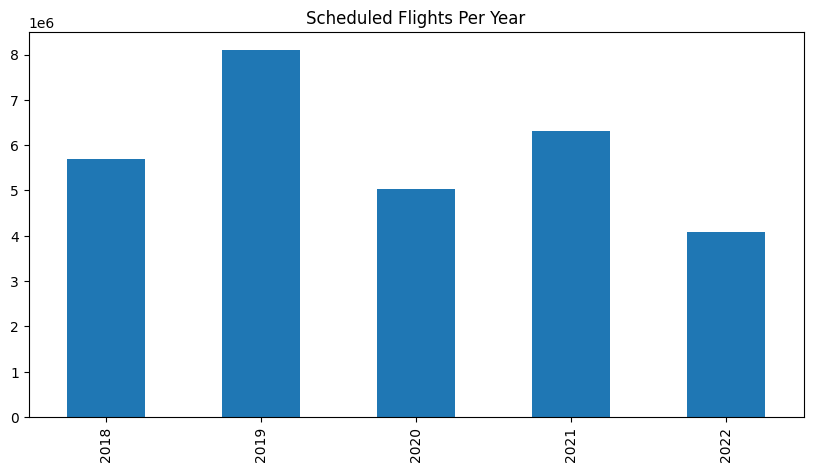

In [8]:
df["Year"] = df['FlightDate'].dt.year
df["Year"].value_counts().sort_index().plot(
    kind="bar", figsize=(10, 5), title="Scheduled Flights Per Year"
)
plt.show()

## What is the Cancellation ratio?

In [9]:
total_flights = len(df)
cancelled_flights = df['Cancelled'].sum()  # This works if Cancelled is 1 for cancelled flights and 0 otherwise
cancellation_ratio = cancelled_flights / total_flights

print(f"Total flights: {total_flights}")
print(f"Cancelled flights: {cancelled_flights}")
print(f"Cancellation ratio: {cancellation_ratio:.2f}")

Total flights: 29193782
Cancelled flights: 777267
Cancellation ratio: 0.03


## Visualisation of amount of Flight Cancellations per day

Text(0.5, 0.92, 'US Flight Cancellations')

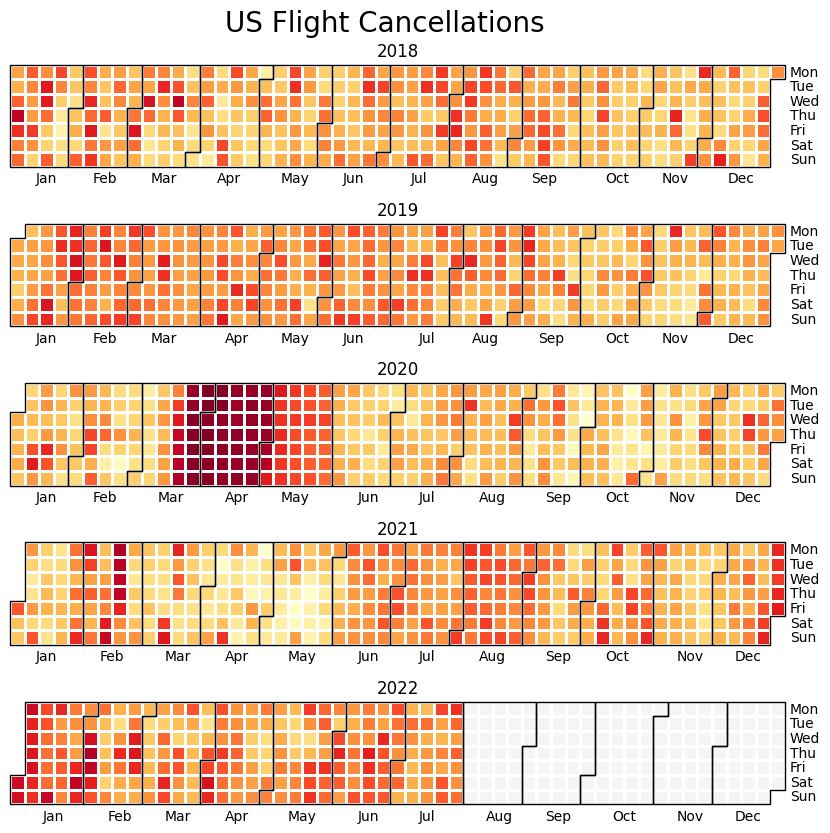

In [10]:
import calmap
events = df.groupby("FlightDate")["Cancelled"].mean()
fig, axs = plt.subplots(5, 1, figsize=(10, 10))
for i, year in enumerate([2018, 2019, 2020, 2021, 2022]):
    calmap.yearplot(
        events.apply(np.log), year=year, cmap="YlOrRd", monthly_border=True, ax=axs[i]
    )
    axs[i].set_title(year)
fig.patch.set_facecolor("white")
fig.suptitle("US Flight Cancellations", y=0.92, fontsize=20)

# Dataset Preparation

![image](images/data_preparation.png)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## Filtering first Months of COVID-19 Pandemic 

In [12]:
# Excluding Spring 2020 from data set to avoid introducing bias from cancellation policies due to the pandemic 
start_date = '2020-03-01'
end_date = '2020-06-30'

# Filter out the dates that fall within this range
df_filtered = df[~((df['FlightDate'] >= start_date) & (df['FlightDate'] <= end_date))]

## Select Features

In [13]:
feature_columns = ["Year", 
                   "Month", 
                   "DayofMonth", 
                   "DayOfWeek", 
                   "CRSDepTime", 
                   "CRSArrTime", 
                   "OriginAirportID", 
                   "DestAirportID", 
                   # "Flight_Number_Marketing_Airline", 
                   "Distance"]
target_column = ["Cancelled"]

X = df_filtered[feature_columns]
y = df_filtered[target_column]

In [14]:
df[feature_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 9 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Year             int64  
 1   Month            int64  
 2   DayofMonth       int64  
 3   DayOfWeek        int64  
 4   CRSDepTime       int64  
 5   CRSArrTime       int64  
 6   OriginAirportID  int64  
 7   DestAirportID    int64  
 8   Distance         float64
dtypes: float64(1), int64(8)
memory usage: 2.0 GB


## Split up Test and Train Set 

In [15]:
# Split data into features and target
X = df_filtered[feature_columns]
y = df_filtered[target_column]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

![image](images/model_training.png)

In [21]:
import lightgbm as lgb

# Create the LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',  # for binary classification
    'metric': 'binary_logloss',  # metric for binary classification
    'boosting_type': 'gbdt',  # default and recommended boosting type Gradient Boosting Decision Tree
    'num_leaves': 31,  # default value
    'learning_rate': 0.05,  # default is 0.01
}

# Train the model
model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=100)


[LightGBM] [Info] Number of positive: 406758, number of negative: 21778517
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.161620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1223
[LightGBM] [Info] Number of data points in the train set: 22185275, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.018335 -> initscore=-3.980461
[LightGBM] [Info] Start training from score -3.980461


# Model Evaluation

![image](images/model_evaluation.png)

## Precision, Recall, F1-score, Accuracy

In [22]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# Convert probabilities to binary output using a threshold (e.g., 0.5)
y_pred_binary = (y_pred >= 0.5).astype(int)

# Evaluate the model
print(classification_report(y_test, y_pred_binary))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.98      1.00      0.99   5444225
        True       0.77      0.00      0.01    102094

    accuracy                           0.98   5546319
   macro avg       0.88      0.50      0.50   5546319
weighted avg       0.98      0.98      0.97   5546319

ROC AUC Score: 0.7651701194338294


Precision: Correct predictions among positive identifications

Recall: Correct positives found in toly)

F1-Score: Balance of precision and reall
all


## Confusion Matrix

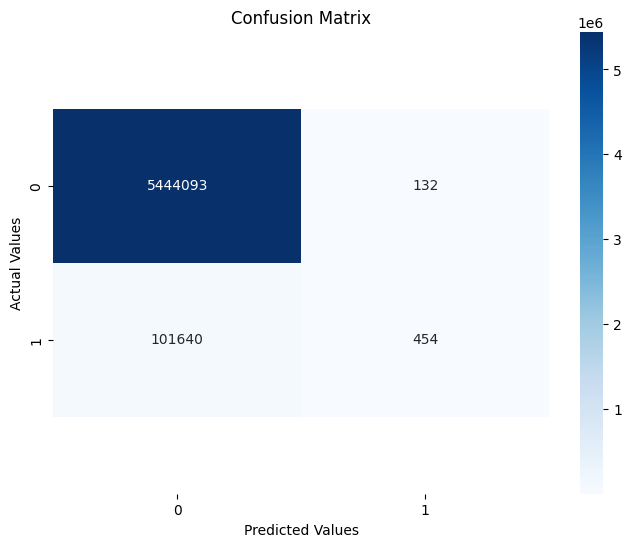

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)  # Using 0.5 as the threshold

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim()  # discover the values for bottom and top
b += 0.5  # Add 0.5 to the bottom
t -= 0.5  # Subtract 0.5 from the top
plt.ylim(b, t)  # update the ylim(bottom, top) values

plt.show()


## ROC Curve

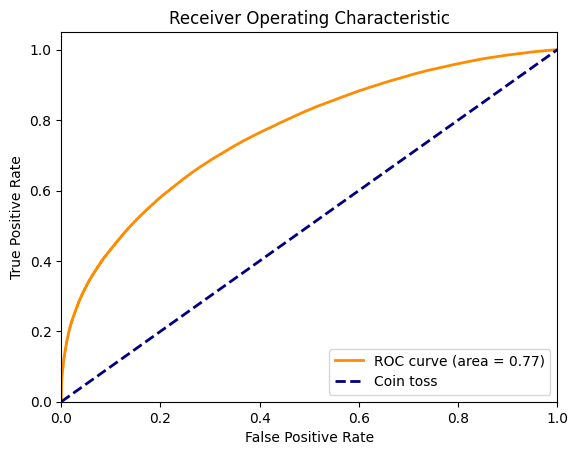

In [24]:
from sklearn.metrics import roc_curve, auc

y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Coin toss')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


ROC AUC:

Helps in understanding how well a model can separate the two classes and is robust against class imbalance

Plots the true positive rate against the false positive rate at various threshold settings


# Further Model Evaluation

In [25]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


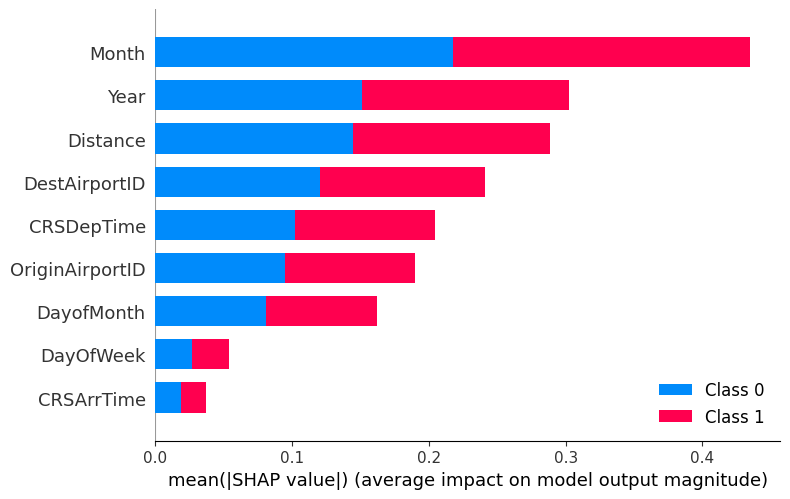

In [26]:
import shap
import lightgbm as lgb
import matplotlib.pyplot as plt

# Create the SHAP explainer object
explainer = shap.TreeExplainer(model)

# Calculate SHAP values - this might take some time for larger datasets
shap_values = explainer.shap_values(X_train)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Saving Model for Deployment

In [29]:
from joblib import dump

In [30]:
dump(model, 'models/lgbm_model.joblib')

['models/lgbm_model.joblib']